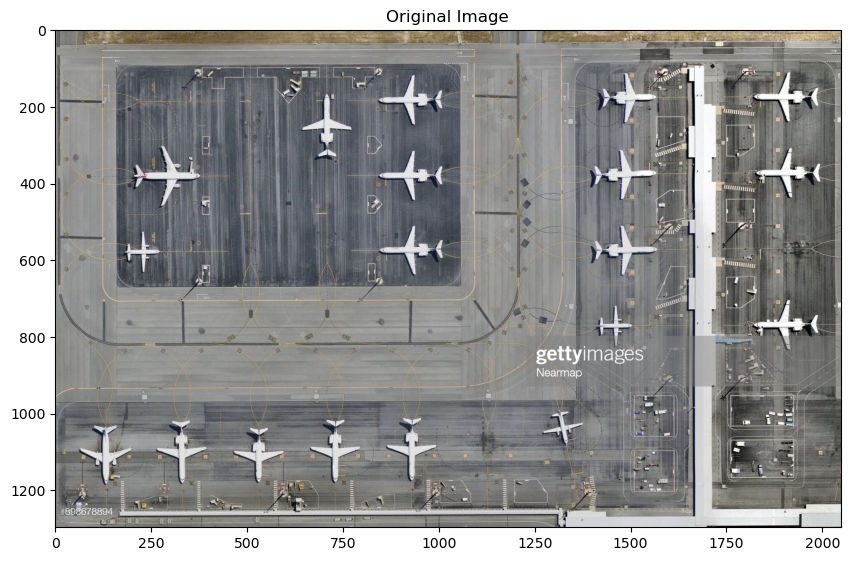

In [414]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 16):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Load & Show our input image
image = cv2.imread('C:/Users/USER/Desktop/Zh/University/Term6/Multimedia/HW/HW2/airport.jpg')
imshow("Original Image", image)

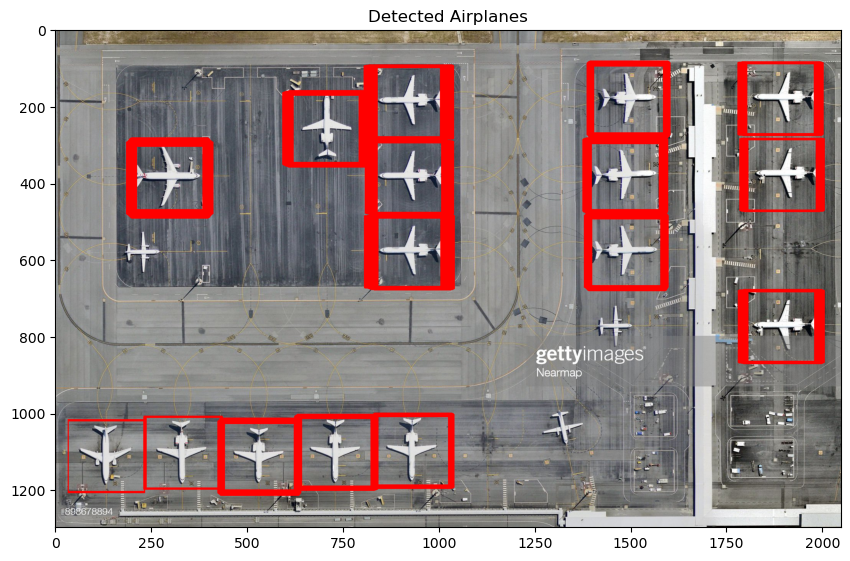

In [415]:
# Grayscale Our image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
copy = image.copy()

# Define Our Template
template = cv2.imread('C:/Users/USER/Desktop/Zh/University/Term6/Multimedia/HW/HW2/template.jpg', cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]

# Template Matching
res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.35
loc = np.where( res >= threshold)

# Draw Rectangles
for pt in zip(*loc[::-1]):
    cv2.rectangle(copy, pt, (pt[0] + w + 15, pt[1] + h + 15), (0,0,255), 1)
imshow('Detected Airplanes', copy)

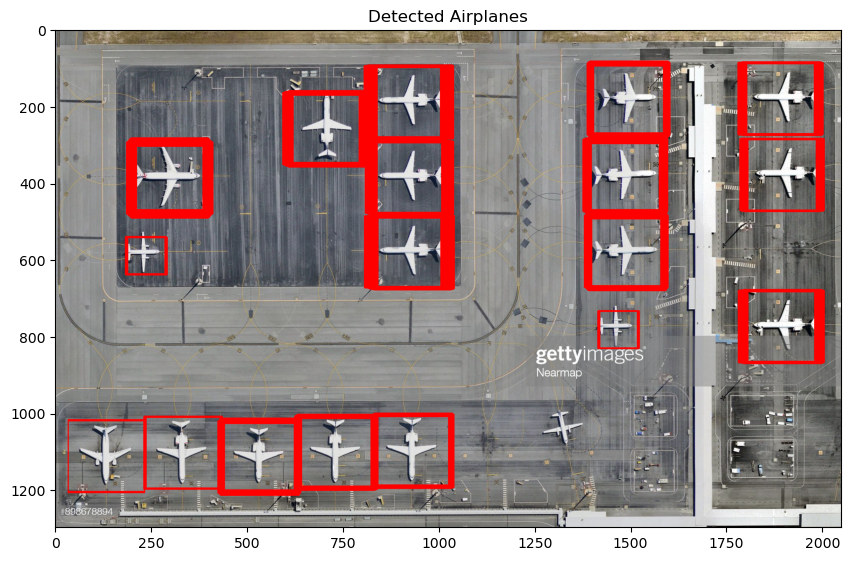

In [416]:
# Resize Our Template to Detect Smaller Airplanes
resized_template = cv2.resize(template, None, fx=0.45, fy=0.45)
w, h = resized_template.shape[::-1]

# Template Matching
res = cv2.matchTemplate(gray, resized_template, cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where( res >= threshold)

# Draw Rectangles
for pt in zip(*loc[::-1]):
    cv2.rectangle(copy, pt, (pt[0] + w + 20, pt[1] + h + 20), (0,0,255), 2)
imshow('Detected Airplanes', copy)

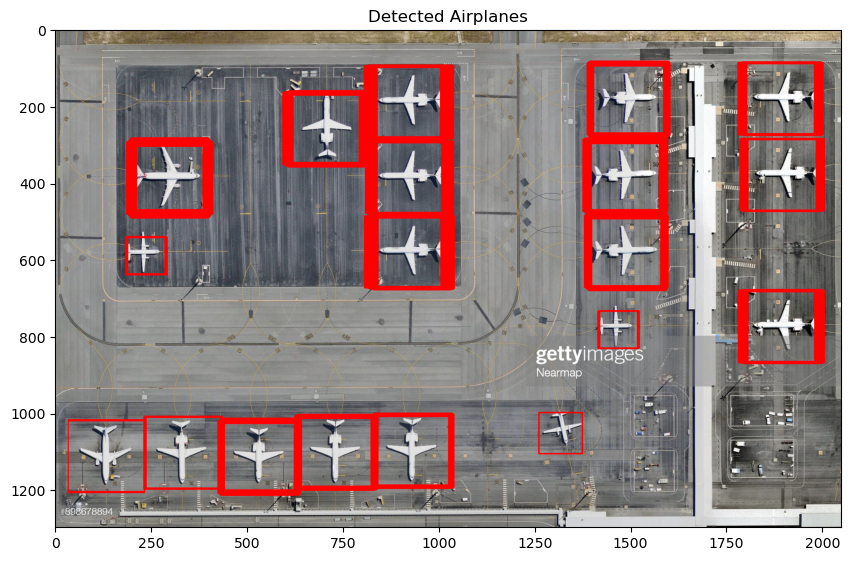

In [417]:
# Rotate Our Resized Template to Detect Rotated Airplanes
height, width = resized_template.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 290, 0.6)
rotated_template = cv2.warpAffine(resized_template, rotation_matrix, (width, height))
w, h = rotated_template.shape[::-1]

# Template Matching
res = cv2.matchTemplate(gray, rotated_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

# Draw Rectangles
for pt in zip(*loc[::-1]):
    cv2.rectangle(copy, pt, (pt[0] - w - 30, pt[1] + h + 30), (0,0,255), 2)
imshow('Detected Airplanes', copy)